In [1]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [4]:
data = pd.read_excel("stock_data.xlsx", index_col=0, parse_dates=True)

In [5]:
data.tail()

,dt,high,low,close
100,2024-05-24,115.500000,111.000000,115.300003
101,2024-05-28,120.739998,112.629997,113.599998
102,2024-05-29,118.989998,113.510002,114.410004
103,2024-05-30,115.900002,113.599998,115.489998
104,2024-05-31,115.800003,114.129997,115.150002


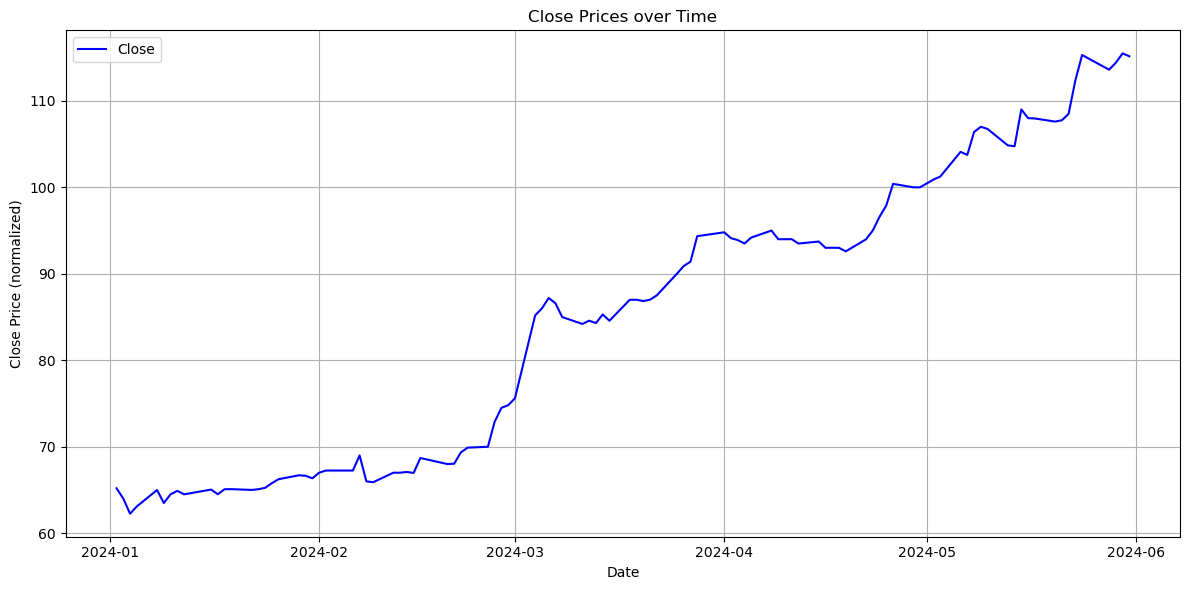

In [6]:


plt.figure(figsize=(12, 6))
plt.plot(data['dt'], data['close'], label='Close', color='blue')
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import random


cols = ['low', 'close', 'high']
scaler = MinMaxScaler(feature_range=(0.5, 5.5))


scaler.fit(data[cols].to_numpy().reshape(-1, 1))


for c in cols:
    data[c] = scaler.transform(data[[c]]).flatten()


random_days_shift = random.randint(-365, 365)
data['dt'] = data['dt'] + pd.to_timedelta(random_days_shift, unit='D')


bad = data.query('high < low or close < low or close > high')
assert bad.empty, f'Нарушения после масштабирования:\n{bad.head()}'


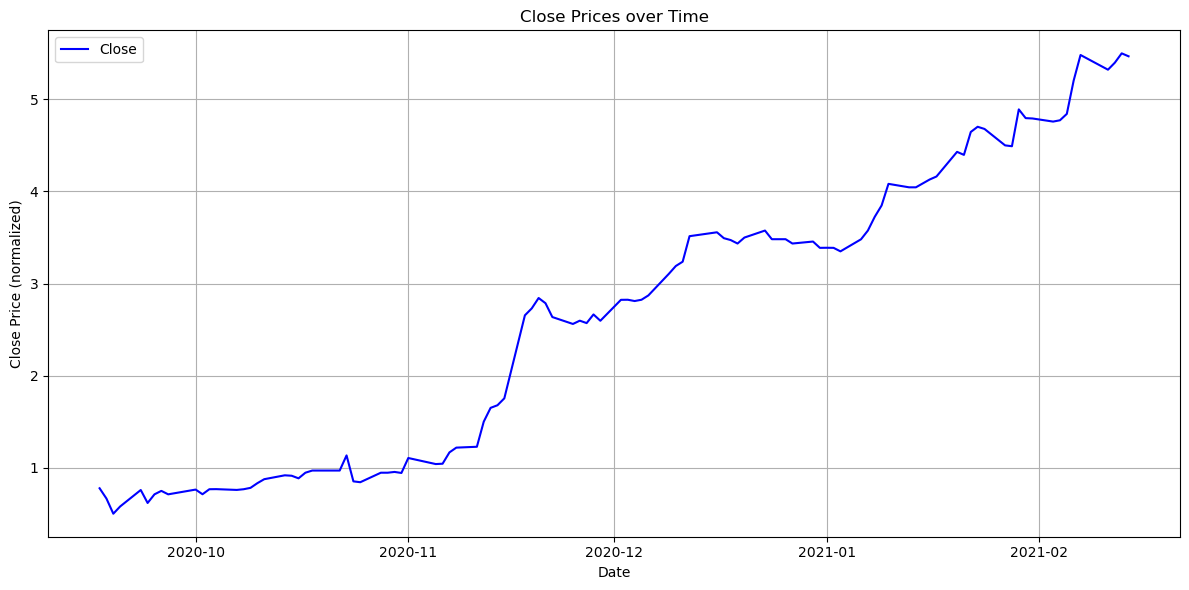

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['dt'], data['close'], label='Close', color='blue')
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


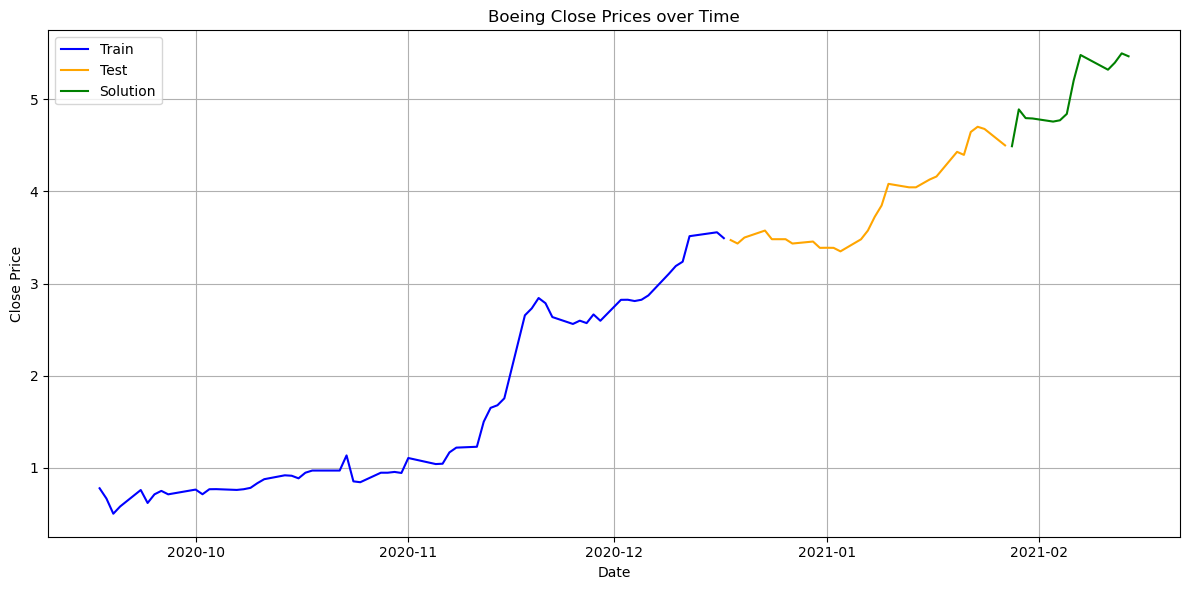

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Разделение данных
train, temp = train_test_split(data, test_size=0.4, shuffle=False)
test, solution = train_test_split(temp, test_size=0.3, shuffle=False)

# Сохраняем файлы в формате CSV
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)  # Только даты
solution.to_csv('solution.csv', index=False)  # Даты + ответы

# Визуализация
plt.figure(figsize=(12, 6))

# Построение графиков в правильной последовательности: train -> test -> solution
plt.plot(train['dt'], train['close'], label='Train', color='blue')
plt.plot(test['dt'], test['close'], label='Test', color='orange')
plt.plot(solution['dt'], solution['close'], label='Solution', color='green')

plt.title('Boeing Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
solution = pd.read_csv('solution.csv')

In [11]:
len(solution)

13

In [12]:
solution_trimmed = []

In [13]:
solution_trimmed

[]

In [14]:
solution_trimmed = solution.reset_index(drop=True)  # сбросим индекс для создания ID
solution_trimmed['ID'] = solution_trimmed.index + 1  # создаем колонку ID
solution_trimmed = solution_trimmed[['ID', 'close']]  # оставляем только ID и close
solution_trimmed.to_csv('solution_0.csv', index=False)

In [15]:
solution_trimmed = solution.reset_index(drop=True)  # сбросим индекс для создания ID
solution_trimmed['ID'] = solution_trimmed.index + 1  # создаем колонку ID
solution_trimmed['Usage'] = 'Public'
solution_trimmed = solution_trimmed[['ID', 'close', 'Usage']]  # оставляем только ID и close

In [16]:
solution_trimmed.to_csv('solution_trimmed.csv', index=False)

In [17]:
solution_trimmed

,ID,close,Usage
0,1,4.491171,Public
1,2,4.891321,Public
2,3,4.796450,Public
3,4,4.792692,Public
4,5,4.758877,Public
5,6,4.772967,Public
6,7,4.842476,Public
7,8,5.205054,Public
8,9,5.482153,Public
9,10,5.322469,Public


# Как это посчитается на Kaggle

In [18]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Чтение файлов
solution_trimmed = pd.read_csv('solution_trimmed.csv')
kaggle_submission = pd.read_csv('sample_submission.csv')

# Проверка, что длины файлов совпадают
assert len(solution_trimmed) == len(kaggle_submission), "The lengths of the datasets do not match!"

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(solution_trimmed['close'], kaggle_submission['close']))
print(f"RMSE between solution and submission: {rmse:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [ ]:
kaggle_submission